
Информация по второму набору:

Age: The age of the individuals in the dataset, representing their chronological age in years.
Gender: The gender identification of the individuals, indicating their gender or gender identity.
Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
Job Title: The occupation or job title of the individuals, specifying their professional role or position.
Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
Country: The country of residence or origin of the individuals, providing geographical information.
Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

Задание:

1) Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

2) Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

3)  Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

4) Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.




In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
"""Загрузка и чтение данных"""
data_salary = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/статистика/statictics/hw3/Файлы_для_ДЗ_Визуализация_данных/salary_dataset.csv')

data_salary.info()
"""Пропуски есть в столбцах age, gender, education level,job title,salary, years of experience"""

data_salary.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Первичный Анализ данных

In [45]:
"""Расчет базовых статистик непрерывынх данных"""
"""Для столбцов с непрерывными данными - возраст, стаж работы, зарплата-  можно определить основные статистические характеристики и расчитать выбросы"""
columns_number = ['Age','Years of Experience','Salary']
for column in columns_number:
    iqr= data_salary[column].quantile(0.75) - data_salary[column].quantile(0.25)
    lower_bound = data_salary[column].quantile(0.25) - 1.5 * iqr
    upper_bound = data_salary[column].quantile(0.75) + 1.5 * iqr
    print(lower_bound,upper_bound)
    outliers = []
    for el in data_salary[column]:
        if el < lower_bound or el > upper_bound:
            if el not in outliers:
                outliers.append(el)
    print(f"Outliers in column {column}:", outliers)
data_salary.describe()


13.0 53.0
Outliers in column Age: [61.0, 57.0, 62.0, 55.0, 56.0, 54.0, 60.0, 58.0]
-10.5 25.5
Outliers in column Years of Experience: [31.0, 30.0, 28.0, 33.0, 27.0, 34.0, 29.0, 26.0, 32.0]
-65000.0 295000.0
Outliers in column Salary: []


,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [104]:
"""Анализ категориальных данных"""
columns_category = ['Gender','Education Level','Job Title','Country','Race']
"""Для столбцов с категориальными данными можно расчитать моду, распределение данных и уникальные значения на проверку выбросов"""

for column in columns_category:
    unique_value_list = []
    mode = data_salary[column].mode()[0]
    count = data_salary[column].value_counts(dropna=False,sort=True)
    unique_value = data_salary[column].unique()
    unique_value_list.append(unique_value)
    print (f"Основные характеристики столбца {column}: мода - {mode}, количество данных - {count} уникальные значения", unique_value_list)
"""В ходе анализа выявлено, что в столбцах есть пропуски
в столбце gender есть значение other (допустим, это означает небинарную гендерную категорию)
в столбце education level есть задвоение одной степени образования - phD
"""


Основные характеристики столбца Gender: мода - Male, количество данных - Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64 уникальные значения [array(['Male', 'Female', 'Other'], dtype=object)]
Основные характеристики столбца Education Level: мода - Bachelor's Degree, количество данных - Education Level
Bachelor's Degree    2270
Master's Degree      1573
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: count, dtype: int64 уникальные значения [array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School'], dtype=object)]
Основные характеристики столбца Job Title: мода - Software Engineer, количество данных - Job Title
Software Engineer             520
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk

'В ходе анализа выявлено, что в столбцах есть пропуски\nв столбце gender есть значение other (допустим, это означает небинарную гендерную категорию)\nв столбце education level есть задвоение одной степени образования - phD\n'

In [48]:
"""Исправление ошибок в данных и работа с пропусками"""
data_salary['Education Level'] = data_salary['Education Level'].replace('phD','PhD')



Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: count, dtype: int64

In [103]:
"""Определение взаимосвязи величин"""
# plt.figure(figsize=[8,5])
# data_salary.groupby('Education Level')['Salary'].mean().plot(kind="bar")
# plt.title("Распределение зарплаты исходя из уровня образования")
# plt.show()
# sns.barplot(data=data_salary, x="Country", y="Salary")
# plt.title("Распределение зарплаты исходя из уровня образования по полу")
# plt.xticks(rotation = 45)
# plt.show()



'Определение взаимосвязи величин'

ЗАМЕНА ПРОПУСКОВ
Замена пропусков в столбце группа образования - мода
Замена пропусков в столбце зарплата будет производиться медианой по группе уровня образования
Замена пропусков в гендере, расе и профессии - модой
Замена пропусков в Years of Experience  и Age - медианой

In [94]:
"""Замена пропусков в категориальных данных"""
columns_list = ['Education Level','Gender','Race','Country','Job Title']
for column in columns_list:
    data_salary[column] = data_salary[column].fillna(data_salary[column].mode()[0])


In [101]:
"""Замена пропусков непрерывных данных"""
data_salary['Salary'] = data_salary['Salary'].fillna(data_salary.groupby('Education Level')['Salary'].transform('median'))
data_salary['Age'] = data_salary['Age'].fillna(data_salary['Age'].median())
data_salary['Years of Experience'] = data_salary['Years of Experience'].fillna(data_salary['Years of Experience'].median())
data_salary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6704 non-null   float64
 2   Gender               6704 non-null   object 
 3   Education Level      6704 non-null   object 
 4   Job Title            6704 non-null   object 
 5   Years of Experience  6704 non-null   float64
 6   Salary               6704 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [102]:
"""Анализ данных после заполнения пропусков"""
columns_category = ['Gender','Education Level','Job Title','Country','Race']
for column in columns_category:
    unique_value_list = []
    mode = data_salary[column].mode()[0]
    count = data_salary[column].value_counts(dropna=False,sort=True)
    unique_value = data_salary[column].unique()
    unique_value_list.append(unique_value)
    print (f"Основные характеристики столбца {column}: мода - {mode}, количество данных - {count} уникальные значения", unique_value_list)
data_salary.describe()

Основные характеристики столбца Gender: мода - Male, количество данных - Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64 уникальные значения [array(['Male', 'Female', 'Other'], dtype=object)]
Основные характеристики столбца Education Level: мода - Bachelor's Degree, количество данных - Education Level
Bachelor's Degree    2270
Master's Degree      1573
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: count, dtype: int64 уникальные значения [array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School'], dtype=object)]
Основные характеристики столбца Job Title: мода - Software Engineer, количество данных - Job Title
Software Engineer             520
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6704.000000,6704.000000,6704.000000
mean,3351.500000,33.618884,8.094197,115303.898717
std,1935.422435,7.614355,6.057691,52775.745698
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


Распределение данных

Распределение непрерывных данных

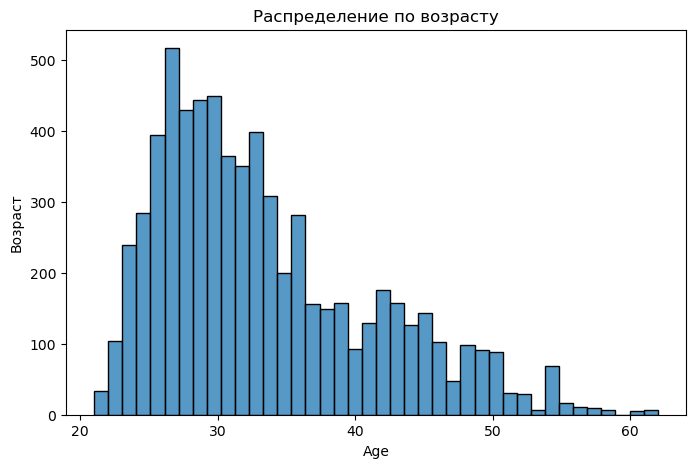

In [23]:
"""Распределение людей по возрасту"""
plt.figure(figsize=[8,5])
sns.histplot(data=data_salary, x="Age", bins=40)
plt.title("Распределение по возрасту")
plt.ylabel("Количество человек")
plt.ylabel("Возраст")
plt.show()

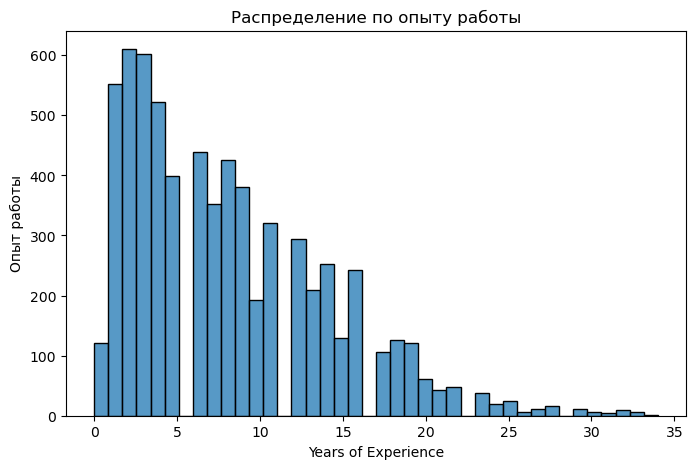

In [30]:
"""Распределение опыта работы среди людей"""
plt.figure(figsize=[8,5])
sns.histplot(data=data_salary, x="Years of Experience", bins=40)
plt.title("Распределение по опыту работы")
plt.ylabel("Количество человек")
plt.ylabel("Опыт работы")
plt.show()

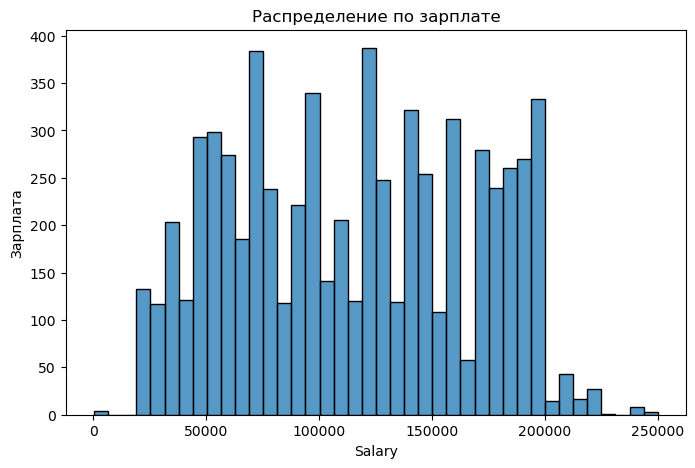

In [32]:
"""Распределение зарплаты среди людей"""
plt.figure(figsize=[8,5])
sns.histplot(data=data_salary, x="Salary", bins=40)
plt.title("Распределение по зарплате")
plt.ylabel("Количество человек")
plt.ylabel("Зарплата")
plt.show()

Распределение категориальных данных

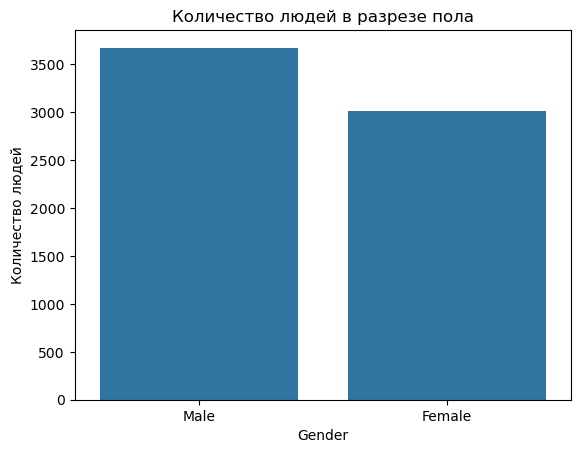

In [41]:
"""В разрезе пола"""
"""В данных есть некорректные данные - other"""
to_drop = data_salary[data_salary['Gender'] == 'Other'].index
data_salary = data_salary.drop(to_drop)
sns.countplot(data=data_salary, x="Gender")
plt.title("Количество людей в разрезе пола")
plt.ylabel("Количество людей")
plt.show()

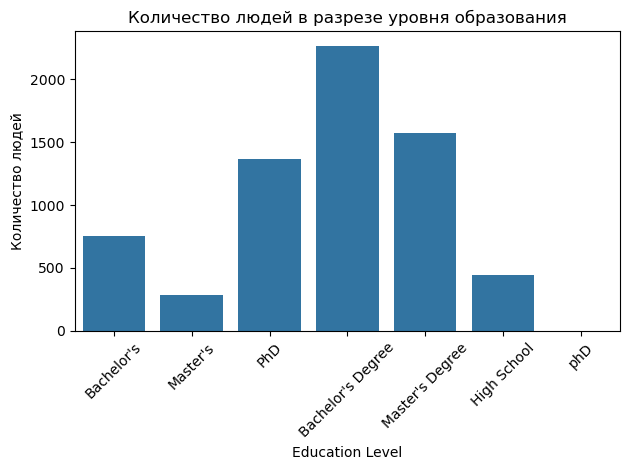

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
5878,5878,27.0,Male,phD,Marketing Coordinator,7.0,120000.0,Canada,Black


In [8]:
"""В разрезе уровня образования"""
sns.countplot(data=data_salary, x="Education Level",native_scale=True)
plt.title("Количество людей в разрезе уровня образования")
plt.ylabel("Количество людей")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


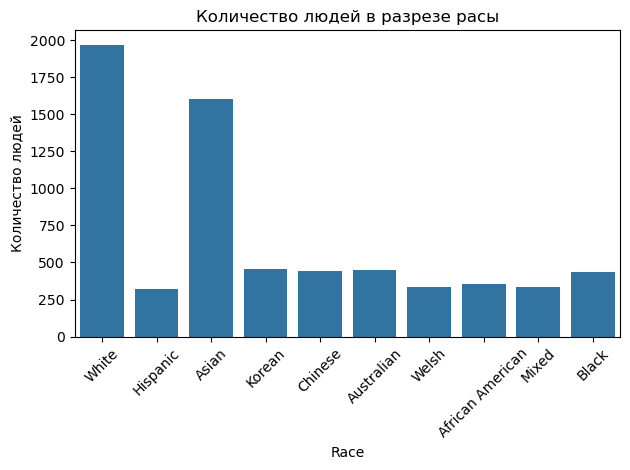

In [33]:
"""В разрезе расы"""
plt.subplot(1,1,1)
sns.countplot(data=data_salary, x="Race")
plt.title("Количество людей в разрезе расы")
plt.ylabel("Количество людей")
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()


Работа с данными:
1) Кто больше зарабатывает: женщины или мужчины (или небинарные работники) ? Гипотеза: мужчины
2) Есть ли в заработной плате расовая градация? Гипотеза: нет
3) Влияет ли уровень образования на размер зарплаты? Гипотеза: да, уровень влияет
4) Влияет ли возраст еа размер зп?Гипотеза: возраст -  нет
5) В какой стране самое больше расовое разнообразие?
6) Кого из пожилых работающих людей больше: мужчин или женщин?



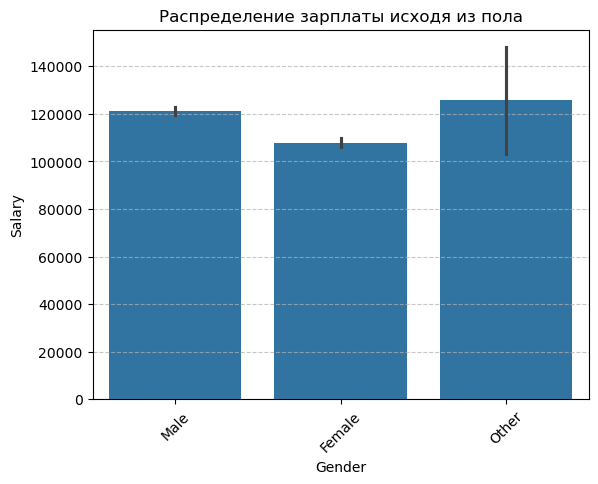

'Ответ: мужчины, если не брать во внимание небинарных пользователей (в данном случае нельзя сказать, к какой категории они относятся явно: люди без гендера или люди, не проставившие пол по какой-либо причине)'

In [132]:
""" Кто больше зарабатывает: женщины или мужчины?"""
sns.barplot(data=data_salary, x="Gender", y="Salary")
plt.title("Распределение зарплаты исходя из пола")
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
"""Ответ: мужчины, если не брать во внимание небинарных пользователей (в данном случае нельзя сказать, к какой категории они относятся явно: люди без гендера или люди, не проставившие пол по какой-либо причине)"""

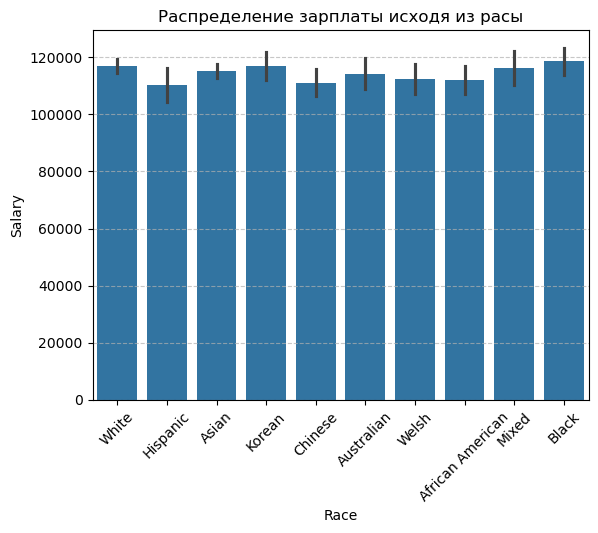

'Ответ - практически несущественная'

In [131]:
"""Есть ли в заработной плате расовая градация"""
sns.barplot(data=data_salary, x="Race", y="Salary")
plt.title("Распределение зарплаты исходя из расы")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation = 45)
plt.show()
"""Ответ - практически несущественная"""

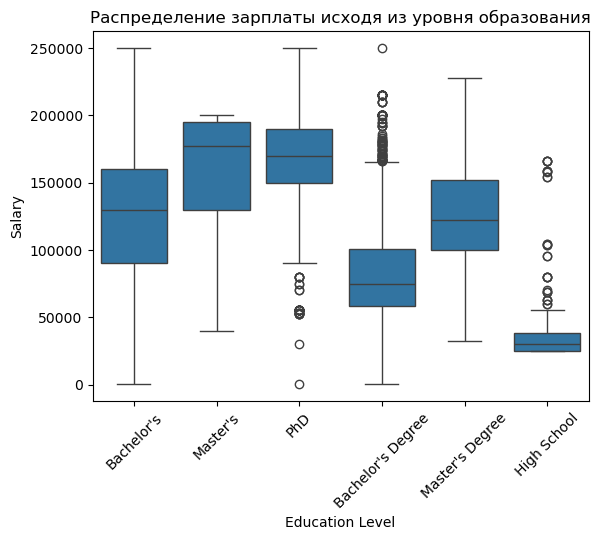

'самая высокая зп зафиксирована у людей со степенью бакалавра'

In [110]:
"""Влияет ли уровень образования на размер зарплаты?"""
sns.boxplot(data=data_salary, x="Education Level", y="Salary")
plt.title("Распределение зарплаты исходя из уровня образования")
plt.xticks(rotation = 45)
plt.show()
"""Ответ да, влияет, средняя зарплата выше у людей с полным высшим образованием - магистров"""
"""Данная диаграмма также демонстрирует количество выбросов, то есть люди с определенным уровнем образованию получают зп меньше или больше, чем среднестатическую"""
"""особенно интересно, что люди , окончившие только школу, могут получать зп в размере, как люди с магистерский и даже выше, чем люди неполным высшим, со степенью магистра"""
"""самая высокая зп зафиксирована у людей со степенью бакалавра"""

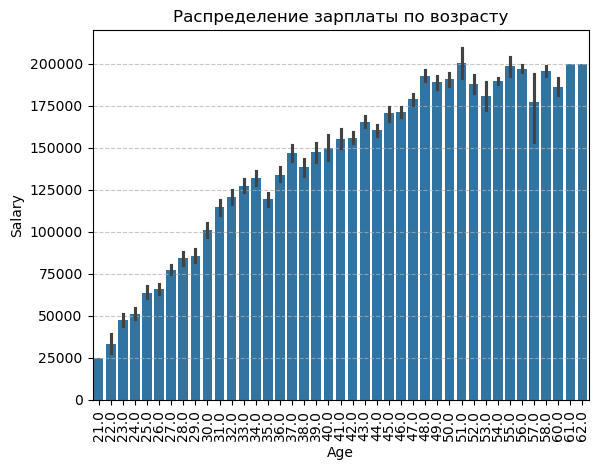

'Ответ - влияет, причем корреляция практически линейная - чем больше возраст, тем больше зп, причем у пожилых людей - самая высокая зп'

In [130]:
"""Влияет ли возраст на размер зп? А возраст + пол?"""
sns.barplot(data=data_salary, x="Age", y="Salary")
plt.title("Распределение зарплаты по возрасту")
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
"""Ответ - влияет, причем корреляция практически линейная - чем больше возраст, тем больше зп, причем у пожилых людей - самая высокая зп"""


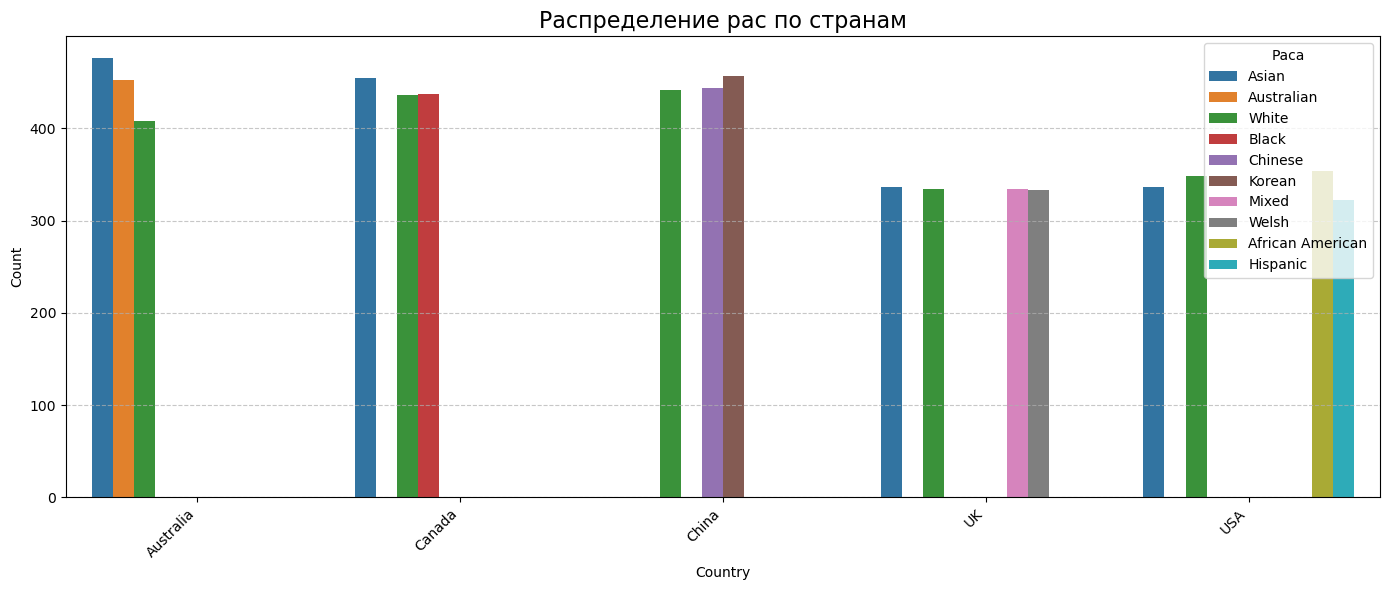

In [129]:
"""В какой стране самое больше расовое разнообразие?"""

grouped_df = data_salary.groupby(['Country', 'Race']).size().reset_index(name='Count')
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped_df, x='Country', y='Count', hue='Race')
plt.title('Распределение рас по странам')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Раса')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
"""Большое расовое разнообразие наблюдается в UK и USA"""


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '55.0'),
  Text(1, 0, '56.0'),
  Text(2, 0, '57.0'),
  Text(3, 0, '58.0'),
  Text(4, 0, '60.0'),
  Text(5, 0, '61.0'),
  Text(6, 0, '62.0')])

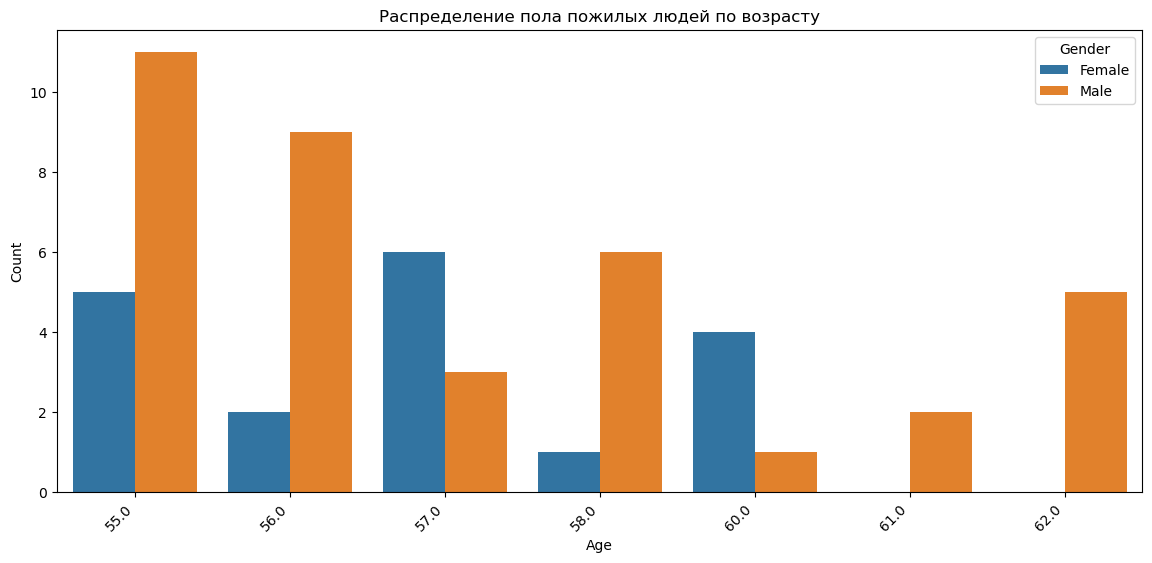

In [145]:
"""Кого из пожилых работающих людей больше: мужчин или женщин?"""
grouped_df = data_salary[data_salary['Age'] >= 55].groupby(['Age', 'Gender']).size().reset_index(name='Count')
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped_df, x='Age', y='Count', hue='Gender')
plt.title('Распределение пола пожилых людей по возрасту')
plt.xticks(rotation=45, ha='right')
"""Ответ - пожилых мужчин работает больше"""
